In [2]:
import pandas as pd

# 读取CSV文件

csv_file_path = 'D:\AI\AAAI会议论文聚类分析\Dataset\[UCI] AAAI-14 Accepted Papers - Papers.csv'
df = pd.read_csv(csv_file_path)

# 将DataFrame保存为Excel文件
excel_file_path = 'D:/AI/AAAI会议论文聚类分析/Dataset/File.xlsx'

df.to_excel(excel_file_path, index=False)

print(f'转换完成，Excel文件保存在: {excel_file_path}')


转换完成，Excel文件保存在: D:/AI/AAAI会议论文聚类分析/Dataset/File.xlsx


d:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[8 5 0 7 1 3 6 9 4 2]


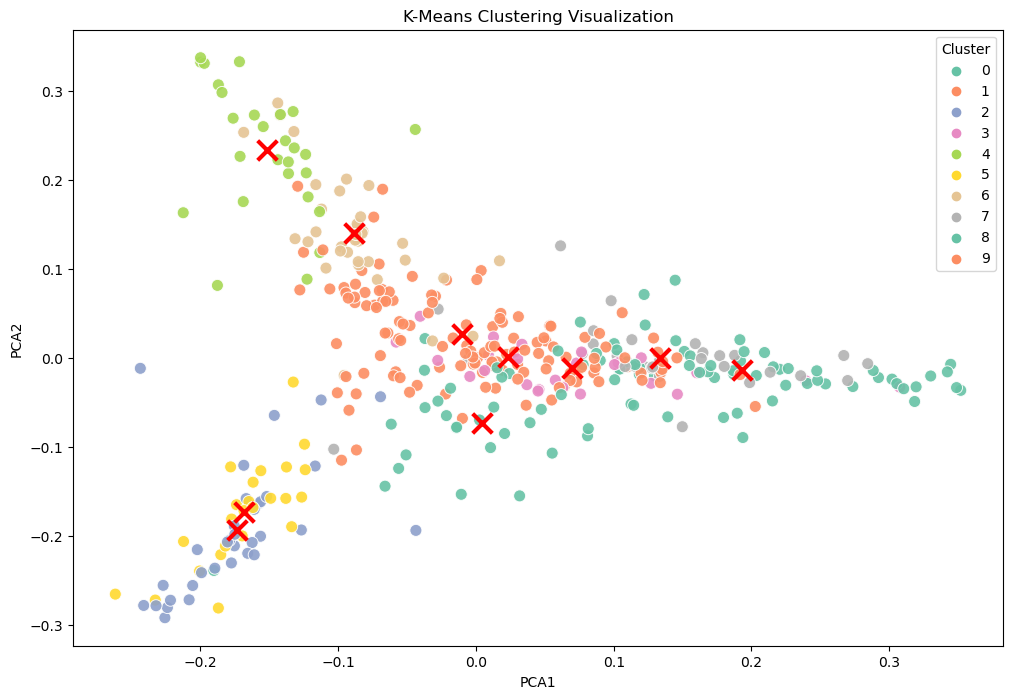

In [27]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# 读取论文数据，假设有一个包含文本的CSV文件，列名为 'Title' 和 'Abstract'
csv_file_path = 'D:\AI\AAAI会议论文聚类分析\Dataset\[UCI] AAAI-14 Accepted Papers - Papers.csv'
df = pd.read_csv(csv_file_path)

# title,authors,groups,keywords,topics,abstract
# 合并 'Title' 和 'Abstract' 列以获取完整的文本
df['Full_Text'] = df['title'].astype(str) + ' '  + df['groups'].astype(str) + ' ' + df['keywords'].astype(str)+ ' ' + df['topics'].astype(str)+ ' ' + df['abstract'].astype(str)

# 使用TfidfVectorizer将文本转化为向量
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['Full_Text'])

# 使用K均值聚类算法，假设我们希望聚成n个类别
n_clusters = 10
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)
print (df['Cluster'].unique())

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# 将降维后的数据加入DataFrame
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

# 设置画布大小
plt.figure(figsize=(12, 8))

# 使用seaborn绘制散点图，根据聚类结果着色
sns.scatterplot(x='PCA1', y='PCA2',  data=df, hue='Cluster',palette='Set2', s=75, alpha=0.9)

# 绘制聚类中心
centers = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], marker='x', s=200, linewidths=3, color='r')

# 手动设置图例
unique_clusters = df['Cluster'].unique()
legend_labels = [f'Cluster {cluster}' for cluster in unique_clusters]
plt.legend(title='Cluster', labels=legend_labels, loc='upper right')

# 添加标题和标签
plt.title('K-Means Clustering Visualization')
plt.xlabel('PCA1')
plt.ylabel('PCA2')

# 显示图例
plt.legend(title='Cluster')

# 显示图形
plt.show()

excel_file_path = 'D:/AI/AAAI会议论文聚类分析/Dataset/File1.xlsx'

df.to_excel(excel_file_path, index=False)